In [1]:
using Pkg
Pkg.status()
VERSION

Status `~/.julia/environments/v1.9/Project.toml`
⌅ [7d9fca2a] Arpack v0.5.3
  [861a8166] Combinatorics v1.0.2
  [a93c6f00] DataFrames v1.6.1
  [b7d42ee7] Einsum v0.4.1
  [d853e229] GroupSlices v0.0.3
  [7073ff75] IJulia v1.25.0
  [a98d9a8b] Interpolations v0.15.1
  [b964fa9f] LaTeXStrings v1.3.1
  [0db19996] NBInclude v2.3.1
  [6fe1bfb0] OffsetArrays v1.14.1
  [91a5bcdd] Plots v1.40.5
  [49802e3a] ProgressBars v1.5.1
⌃ [92933f4c] ProgressMeter v1.10.0
  [d330b81b] PyPlot v2.11.5
⌃ [6e0679c1] QuantumOptics v1.0.9
⌃ [295af30f] Revise v3.5.15
  [2913bbd2] StatsBase v0.34.3
⌅ [0c5d862f] Symbolics v5.11.0
  [afbbf031] TypedPolynomials v0.4.1
  [9e88b42a] Serialization
  [2f01184e] SparseArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


v"1.9.3"

In [2]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using LaTeXStrings
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("KM_Model.jl")

In [3]:
Nx = 4
Ny = 4
p = 1
q = 2
pn = 2
U = 1

N = Nx*Ny
t = 1
#NPhi0 = Int(Nx*Ny*(p/q))
Cut_Off = 16

16

In [154]:
# PROJECTION CODE
matrix = KM(Nx, Ny, t, p, q)
basis_sp = NLevelBasis(N)
H = Sp_Op(basis_sp, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(basis_sp, H, Cut_Off)
HardCore=true
basis_cut_mb = get_Bosonic_MB_Basis(Sub_Basis, pn, HardCore)
H_MB_sub = get_mb_op(basis_cut_mb, H_sp_Sub)
basis_mb_sub = boson_mb_basis(Sub_Basis, pn, HardCore)
H_Int = Hubbard_Interaction_fixed_prtcl(basis_sp)
H_Int_Sub = Hubbard_Int_fixed_prtc_sub(H_Int, P, Pt, Sub_Basis, basis_mb_sub)
H_Total_hardcore = H_MB_sub + H_Int_Sub 
H_Total_hardcore = (H_Total_hardcore'+H_Total_hardcore)/2  

In [4]:
# PROJECTION CODE
matrix = KM(Nx, Ny, t, p, q)
basis_sp = NLevelBasis(N)
H = Sp_Op(basis_sp, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(basis_sp, H, Cut_Off)
HardCore=false
basis_cut_mb = get_Bosonic_MB_Basis(Sub_Basis, pn, HardCore)
H_MB_sub = get_mb_op(basis_cut_mb, H_sp_Sub)
basis_mb_sub = boson_mb_basis(Sub_Basis, pn, HardCore)
H_Int = Hubbard_Interaction_fixed_prtcl(basis_sp)
H_Int_Sub = Hubbard_Int_fixed_prtc_sub(H_Int, P, Pt, Sub_Basis, basis_mb_sub)
H_Total_finite = H_MB_sub + H_Int_Sub 
H_Total_finite = (H_Total_finite'+H_Total_finite)/2  

Operator(dim=136x136)
  basis: ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=16), states:16), states:136)
    -1.86305+0.0im          …    0.0334027+0.0151386im
 -0.00388253-0.00688455im       -0.0028147-0.00836646im
  -0.0105199-0.0121935im        0.00976945+0.00657007im
  0.00178273+0.00268501im        0.0146063+0.00828929im
 -0.00969374+0.00690254im        0.0197519+1.6741e-5im
    -0.01261+0.000919886im  …  0.000392095+0.0221936im
   0.0118971-0.00550724im        0.0142797+0.00692614im
   0.0149492+0.000192705im      0.00780831+0.0321181im
  -0.0171364-0.00743175im      -0.00569239+0.0152953im
  -0.0582856-0.0015002im        0.00121885+0.0415166im
            ⋮               ⋱             ⋮
  0.00916997-0.0193169im       -0.00830343-0.0274546im
 -0.00414955-0.00133764im         -3.0e-17-0.0im
 -0.00894331-0.00753913im          1.0e-16-1.0e-16im
 -0.00386697+0.00827437im   …    0.0582183-0.0221809im
  0.00656267-0.0142775im          -3.0e-17+1.0e-17im
  -0.0145262-0.000256546im

In [143]:
ϵ_hard_core, λ_hard_core = eigenstates(H_Total_hardcore);

In [8]:
ϵ_finite, λ_finite = eigenstates(H_Total_finite);

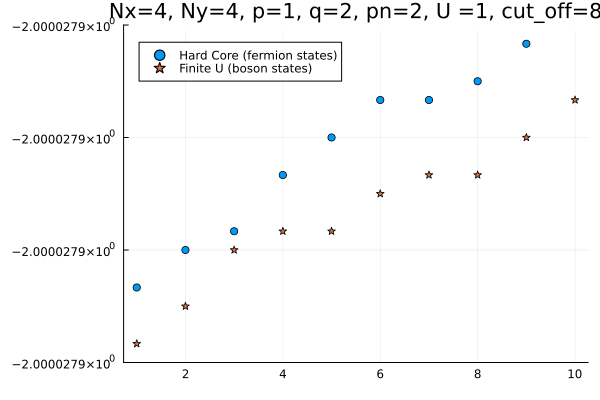

GKS: Possible loss of precision in routine SET_WINDOW


In [145]:
n=1
m=10
scatter(ϵ_hard_core[n:m], label="Hard Core (fermion states)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off)")
scatter!(ϵ_finite[n:m], label="Finite U (boson states)",marker=:star)

In [146]:
# WITHOUT PROJECTION
matrix = KM(Nx, Ny, t, p, q)
basis_sp = NLevelBasis(N)
H = Sp_Op(basis_sp, matrix)
HardCore=true
basis_mb = get_Bosonic_MB_Basis(basis_sp, pn, HardCore)
H_MB = get_mb_op(basis_mb, H)
H_Int = Hubbard_Interaction_Full(N, basis_sp, basis_mb, U)
H_Total_full_hard_Core = H_MB + H_Int
H_Total_full_hard_Core = (H_Total_full_hard_Core'+H_Total_full_hard_Core)/2

Operator(dim=120x120)
  basis: ManyBody(onebodybasis=NLevel(N=16), states:120)sparse([2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  104, 105, 109, 110, 113, 114, 116, 117, 118, 119], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [147]:
E_full_hard_core, λ_full_hard_core = eigenstates(dense(H_Total_full_hard_Core));

In [9]:
# WITHOUT PROJECTION
matrix = KM(Nx, Ny, t, p, q)
basis_sp = NLevelBasis(N)
H = Sp_Op(basis_sp, matrix)
HardCore=false
basis_mb = get_Bosonic_MB_Basis(basis_sp, pn, HardCore)
H_MB = get_mb_op(basis_mb, H)
H_Int = Hubbard_Interaction_Full(N, basis_sp, basis_mb, U)
H_Total_full_finite = H_MB + H_Int
H_Total_full_finite = (H_Total_full_finite'+H_Total_full_finite)/2

Operator(dim=136x136)
  basis: ManyBody(onebodybasis=NLevel(N=16), states:136)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 100, 108, 115, 121, 126, 130, 133, 135, 136], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

In [10]:
E_full_finite, λ_full_finite = eigenstates(dense(H_Total_full_finite));

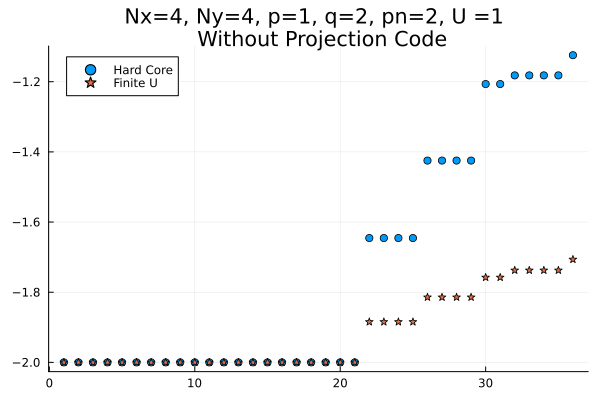

In [150]:
#ion()
n=1
m=36
scatter(E_full_hard_core[n:m], label="Hard Core", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n Without Projection Code")
scatter!(E_full_finite[n:m], label="Finite U",marker=:star)

#show()

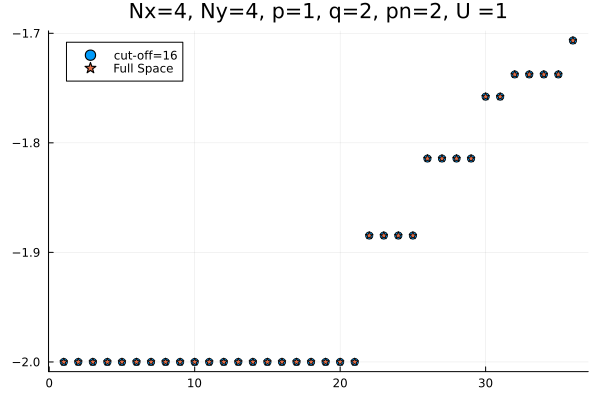

In [11]:
#ion()
n=1
m=36
scatter(ϵ_finite[n:m], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")
scatter!(E_full_finite[n:m], label="Full Space",marker=:star)

#show()